# Sentiment Analysis and Text Classification with Deep Neural Nets

### The IMDB dataset

**Loading the IMDB dataset**

In [51]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [52]:
len(train_data)

25000

In [53]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [54]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [55]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [56]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [57]:
len(word_index)

88584

In [58]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [59]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [60]:
x_train[3]

array([0., 1., 1., ..., 0., 0., 0.])

In [61]:
len(x_train[3])

10000

In [62]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [63]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


**Compiling the model**

In [64]:
model.compile(optimizer="adam", # or rmsprop
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [65]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [66]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5007 - accuracy: 0.7981 - val_loss: 0.3436 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2514 - accuracy: 0.9121 - val_loss: 0.2886 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1688 - accuracy: 0.9435 - val_loss: 0.2822 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1226 - accuracy: 0.9631 - val_loss: 0.3038 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0905 - accuracy: 0.9749 - val_loss: 0.3222 - val_accuracy: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 47ms/step - loss: 0.0655 - accuracy: 0.9855 - val_loss: 0.3546 - val_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0485 - accuracy: 0.9915 - val_loss: 0.3862 - val_accuracy: 0.8773
Epoch 8/20
30

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

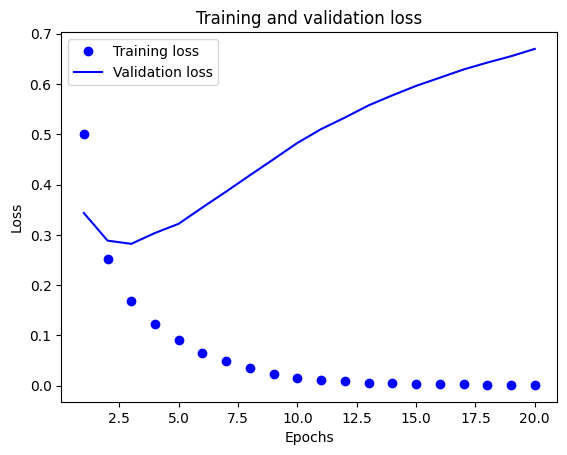

In [68]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

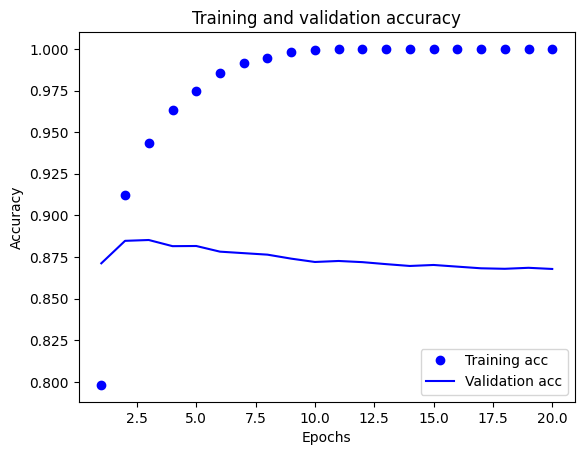

In [69]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [70]:
len(train_data)/512

48.828125

In [ ]:
model = keras.Sequential([
    layers.Dense(120, activation="relu"),
    layers.Dense(52, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 8s 125ms/step - loss: 0.3658 - accuracy: 0.8496 - val_loss: 0.1736 - val_accuracy: 0.9404
Epoch 2/4
49/49 [==============================] - 5s 99ms/step - loss: 0.1856 - accuracy: 0.9309 - val_loss: 0.1226 - val_accuracy: 0.9622
Epoch 3/4
49/49 [==============================] - 6s 117ms/step - loss: 0.1273 - accuracy: 0.9546 - val_loss: 0.0797 - val_accuracy: 0.9789
Epoch 4/4
49/49 [==============================] - 5s 99ms/step - loss: 0.0870 - accuracy: 0.9714 - val_loss: 0.0509 - val_accuracy: 0.9882


In [12]:
results # [loss, accuracy]

[0.43084487318992615, 0.8644800186157227]

### Using a trained model to generate predictions on new data

In [13]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


array([[0.0597417 ],
       [0.9999954 ],
       [0.19943511],
       ...,
       [0.0596686 ],
       [0.01139788],
       [0.8274783 ]], dtype=float32)

### Further experiments

REUTERS ## Classifying newswires: A multiclass classification example

**Loading the Reuters dataset**

In [15]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
train_labels

45

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

**Decoding newswires back to text**

In [18]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# dict.get(key, value_if_no_such_key) returns the value
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [20]:
y_train[0]

1.0

In [21]:
import numpy as np
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [22]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [23]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building your model

**Model definition**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # number of classes = 46
])

**Compiling the model**

In [25]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 3.2007 - accuracy: 0.3900 - val_loss: 2.4563 - val_accuracy: 0.5520
Epoch 2/20
16/16 [==============================] - 1s 58ms/step - loss: 1.9422 - accuracy: 0.6206 - val_loss: 1.6135 - val_accuracy: 0.6410
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.3266 - accuracy: 0.7190 - val_loss: 1.2842 - val_accuracy: 0.7050
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 1.0009 - accuracy: 0.7791 - val_loss: 1.1215 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 1s 78ms/step - loss: 0.7802 - accuracy: 0.8332 - val_loss: 1.0284 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 90ms/step - loss: 0.6099 - accuracy: 0.8732 - val_loss: 0.9666 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 1s 72ms/step - loss: 0.4791 - accuracy: 0.9034 - val_loss: 0.9303 - val_accuracy: 0.8040
Epoch 8/20
16

**Plotting the training and validation loss**

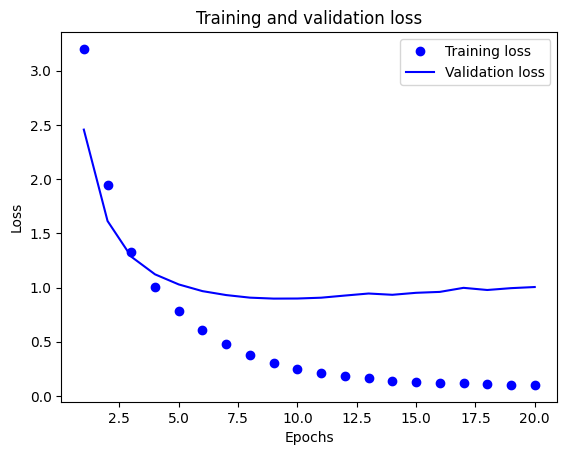

In [28]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

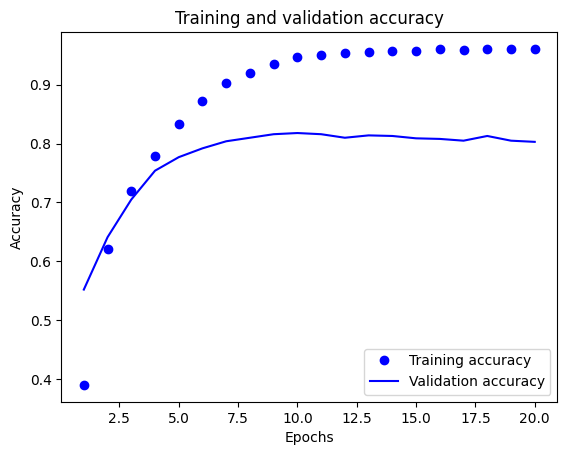

In [29]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [30]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 80ms/step - loss: 3.1425 - accuracy: 0.3948 - val_loss: 2.2580 - val_accuracy: 0.5600
Epoch 2/9
18/18 [==============================] - 1s 51ms/step - loss: 1.7791 - accuracy: 0.6422 - val_loss: 1.3565 - val_accuracy: 0.6870
Epoch 3/9
18/18 [==============================] - 1s 51ms/step - loss: 1.2157 - accuracy: 0.7287 - val_loss: 0.9904 - val_accuracy: 0.7840
Epoch 4/9
18/18 [==============================] - 1s 64ms/step - loss: 0.9349 - accuracy: 0.7977 - val_loss: 0.7567 - val_accuracy: 0.8410
Epoch 5/9
18/18 [==============================] - 2s 85ms/step - loss: 0.7277 - accuracy: 0.8461 - val_loss: 0.5709 - val_accuracy: 0.8870
Epoch 6/9
18/18 [==============================] - 1s 77ms/step - loss: 0.5593 - accuracy: 0.8862 - val_loss: 0.4328 - val_accuracy: 0.9170
Epoch 7/9
18/18 [==============================] - 1s 51ms/step - loss: 0.4294 - accuracy: 0.9120 - val_loss: 0.3314 - val_accuracy: 0.9410
Epoch 8/9
18/18 [===

In [31]:
results

[0.9361571073532104, 0.799198567867279]

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1892252894033838

### Generating predictions on new data

In [33]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [34]:
predictions[0].shape

(46,)

In [35]:
predictions[0]

array([2.4672259e-05, 2.4577702e-04, 3.4257766e-05, 9.1141891e-01,
       7.3323287e-02, 7.5576711e-05, 5.4848737e-05, 6.4224922e-05,
       5.8555086e-03, 3.6440084e-05, 1.0882092e-04, 1.0839063e-03,
       2.6967542e-04, 3.8559843e-04, 1.1126934e-04, 3.6358095e-05,
       5.4876547e-04, 9.1635702e-05, 1.8318552e-04, 2.4535875e-03,
       1.2688322e-03, 1.8248839e-04, 2.2591148e-05, 1.5327605e-04,
       3.4723158e-05, 8.1124126e-05, 2.1826125e-05, 9.3264280e-05,
       2.4491257e-05, 1.9603632e-04, 4.7883287e-04, 2.8306060e-04,
       6.5794069e-05, 1.3157082e-05, 6.0269380e-05, 3.8426049e-05,
       8.3926927e-05, 8.3732659e-05, 1.1404830e-05, 1.7113240e-04,
       1.7433909e-05, 1.6000864e-05, 4.8241305e-05, 5.3778378e-05,
       1.7085151e-05, 7.2659655e-05], dtype=float32)

In [39]:
max(predictions[0])

0.9114189

In [40]:
np.sum(predictions[0])

0.9999998

In [41]:
np.argmax(predictions[0])

3

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
  model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))